# Time sequence primer using Pytorch

In [378]:
import torch
torch.__version__

'1.2.0'

In [379]:
from torch.utils import data
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from torch.utils.tensorboard import SummaryWriter
from IPython import embed
import pandas as pd

## Time varying signal

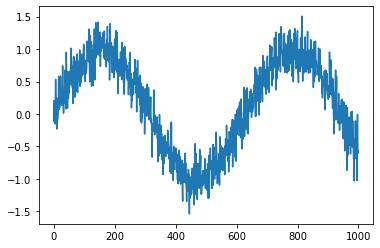

In [184]:
N = 1000
t = np.arange(N)
x = np.sin(0.01*t) + 0.2 * np.random.normal(size=N)
plt.plot(x)

$$y_t = data_t, x_t = data_{t-1}... data_{t-1-M}$$

## Define features & labels

- input is a history of points of size k: $x[0:k]$
- output is the point at time k+1 given k points: $x[k]$

In [185]:
M = 5
i = 1
# history of 10 for signal x: x[0:10]
print(i, i+M)
print(x[i:i + (M)])
print(i, i+(M+1))
print(x[i:i + (M+1)])
print(i+M)
print(x[i+M])

1 6
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403]
1 7
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403  0.53307748]
6
0.5330774770530665


In [186]:
X = []
y = []
for i in range(0, N-M):
    X.append(x[i:(i+M)])
    y.append(x[i+M])

In [192]:
print(X[0],y[0])
print(X[1],y[1])

[ 0.20247964 -0.11661362  0.19604669  0.16984733 -0.15508892] 0.15699402885720062
[-0.11661362  0.19604669  0.16984733 -0.15508892  0.15699403] 0.5330774770530665


In [200]:
tutu = torch.from_numpy(X[0])
print(tutu)
print(type(tutu))
len(X)

tensor([ 0.2025, -0.1166,  0.1960,  0.1698, -0.1551], dtype=torch.float64)
<class 'torch.Tensor'>


995

## Train / Test partition

In [207]:
test_size = int(len(ds) * 0.20)
train_size = int(len(ds) * 0.8)
print(test_size)
print(train_size)

199
796


In [215]:
X_train, X_test = X[0:train_size], X[train_size:]
y_train, y_test = y[0:train_size], y[train_size:]

## Pytorch Dataset

this will allow use to use pytorch dataloader class to define batches and potentially paralellize processing per batch

In [216]:
class TimeDataset(data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, features, labels):
        'Initialization'
        self.labels = labels
        self.features = features
        self.dtype = torch.cuda.FloatTensor if torch.cuda.is_available() else torch.FloatTensor
        
  def __len__(self):
        'Denotes the total number of samples'
        return len(self.features)

  def __getitem__(self, index):
        'Generates one sample of data'

        # Load data and get label
        X = torch.from_numpy(self.features[index])
        # expecting numpy array not float
        y = torch.from_numpy(np.array(self.labels[index]))
        sample = {'X': X, 'y':y }
        return sample

In [217]:
ds = TimeDataset(X,y)

In [218]:
print(ds[0])

{'X': tensor([ 0.2025, -0.1166,  0.1960,  0.1698, -0.1551], dtype=torch.float64), 'y': tensor(0.1570, dtype=torch.float64)}


In [235]:
train_ds = TimeDataset(X_train, y_train)
test_ds = TimeDataset(X_test, y_test)

In [236]:
print(test_ds[0])

{'X': tensor([1.0710, 1.1669, 0.9224, 1.2145, 1.2816], dtype=torch.float64), 'y': tensor(0.6334, dtype=torch.float64)}


## Pytorch DataLoader

In [431]:
params_train = {'batch_size': 64,
          'shuffle': False,
          'num_workers': 1
         }

params_test = {'batch_size': 64,
          'shuffle': False,
          'num_workers': 1
         }

In [432]:
train_dl = data.DataLoader(train_ds, **params_train)
test_dl = data.DataLoader(test_ds, **params_test)

In [399]:
type(test_dl)

torch.utils.data.dataloader.DataLoader

In [400]:
for i, batch in enumerate(test_dl):
    print(batch['y'])

tensor([0.6334, 0.7057, 0.4882, 0.8916, 0.6893, 0.9930, 0.9350, 0.9575, 0.6522,
        1.1714, 0.9996, 0.7385, 0.9610, 1.5053, 0.8910, 0.7878, 0.5056, 0.9938,
        0.8523, 0.6260, 0.6645, 0.9252, 0.7337, 1.1486, 1.1858, 0.6544, 0.7366,
        0.6469, 0.9560, 0.6884, 0.9186, 1.0506, 1.2718, 0.7057, 0.9691, 0.6298,
        0.9763, 0.9824, 0.9054, 0.6474, 0.9642, 0.6363, 1.1438, 1.1311, 1.0452,
        0.9463, 0.7153, 0.9894, 0.8138, 0.8223, 0.9468, 0.4074, 0.9262, 0.4953,
        1.1136, 0.6233, 0.5752, 1.0444, 1.1212, 0.8635, 0.7356, 0.8113, 0.7406,
        0.7319], dtype=torch.float64)
tensor([ 6.0146e-01,  7.0996e-01,  6.5055e-01,  6.6337e-01,  1.0156e+00,
         5.8858e-01,  5.0252e-01,  8.0628e-01,  7.8919e-01,  9.9717e-01,
         5.5548e-01,  7.3197e-01,  7.4661e-01,  6.8224e-01,  5.4447e-01,
         3.1418e-01,  5.8170e-01,  2.4736e-01,  4.4108e-01,  5.2195e-01,
         4.3585e-01,  4.7535e-01,  4.2197e-01,  6.6000e-01,  4.3769e-01,
         6.7713e-02,  6.6988e-01,  3.

## Model

In [385]:
print(test_dl.dataset.features[0])

[1.07099295 1.1668531  0.92240677 1.21453613 1.28159232]


In [244]:
print(params)

{'batch_size': 64, 'shuffle': True, 'num_workers': 1}


In [245]:
params['batch_size']

64

In [433]:
n_in = len(test_dl.dataset.features[0])
n_out = 1
n_h = 10

In [459]:
def weights_init(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_normal_(m.weight.data)
        m.bias.data.zero_()
        #nn.init.xavier_normal(m.bias)
        # nn.init.xavier_normal_(m.weight.data)
        # nn.init.normal_(m.bias.data)
        
class VanillaMLP(nn.Module):
    def __init__(self, n_in, n_h, n_out):
        super(VanillaMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(n_in, n_h),
            nn.ReLU(),
            nn.Linear(n_h,n_out)
        )
        

    def forward(self, x):
        pred = self.layers(x)
        return pred
    

In [460]:
model = VanillaMLP(n_in, n_h, n_out).float()
#model.apply(weights_init)
print(model)

VanillaMLP(
  (layers): Sequential(
    (0): Linear(in_features=5, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=1, bias=True)
  )
)


In [461]:
#optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [462]:
loss_fn = nn.MSELoss()

## Training

In [463]:
writer = SummaryWriter()

In [464]:
epochs = 100

In [465]:
mean_train_losses = []
mean_valid_losses = []
valid_acc_list = []

for epoch in range(epochs):
    model.train()
    train_losses = []
    valid_losses = []
    for i, batch in enumerate(train_dl):
        optimizer.zero_grad()
#        embed()
        y_hat = model(batch['X'].float())
        loss = loss_fn(y_hat, batch['y'].float())
        writer.add_scalar('loss/train',loss, epoch)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for i, batch in enumerate(test_dl):
            y_hat = model(batch['X'].float())
            loss = loss_fn(y_hat, batch['y'].float())
            writer.add_scalar('loss/valid',loss, epoch)
            valid_losses.append(loss.item())

    mean_train_losses.append(np.mean(train_losses))
    mean_valid_losses.append(np.mean(valid_losses))

    if (epoch%10 == 0):
        print('epoch : {}, train loss : {:.4f}, valid loss : {:.4f} '\
              .format(epoch, np.mean(train_losses), np.mean(valid_losses)))

writer.close()

/home/workfit/anaconda3/envs/rnnlm/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/home/workfit/anaconda3/envs/rnnlm/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([28])) that is different to the input size (torch.Size([28, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch : 0, train loss : 0.4453, valid loss : 0.2279 


/home/workfit/anaconda3/envs/rnnlm/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch : 10, train loss : 0.0918, valid loss : 0.0960 
epoch : 20, train loss : 0.0867, valid loss : 0.0977 
epoch : 30, train loss : 0.0851, valid loss : 0.0971 
epoch : 40, train loss : 0.0842, valid loss : 0.0968 
epoch : 50, train loss : 0.0836, valid loss : 0.0967 
epoch : 60, train loss : 0.0832, valid loss : 0.0966 
epoch : 70, train loss : 0.0829, valid loss : 0.0965 
epoch : 80, train loss : 0.0827, valid loss : 0.0964 
epoch : 90, train loss : 0.0825, valid loss : 0.0964 


## Plot

### matplotlib

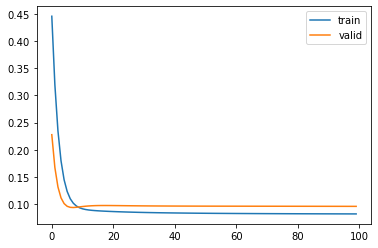

In [466]:
fig, ax1 = plt.subplots(nrows=1) #, figsize=(15, 10))
ax1.plot(mean_train_losses, label='train')
ax1.plot(mean_valid_losses, label='valid')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

### Tensorboard 

In [ ]:
!tensorboard --logdir runs

## Predict

In [446]:
type(X)

list

In [467]:
T = torch.from_numpy(np.array(X))

In [468]:
predictions = model(T.float())

In [469]:
predictions.shape

torch.Size([995, 1])

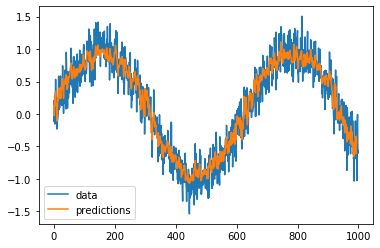

In [470]:
fig, ax1 = plt.subplots(nrows=1) #, figsize=(15, 10))
ax1.plot(x, label='data')
ax1.plot(predictions.detach().numpy(), label='predictions')
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines, labels, loc='best')

## Discussion

The problem with this model is that after a certain time step, the predictions are based on already predicted values and the error explodes 